## 1. Dataset Exploration:


In [29]:
import pandas as pd

# Load the dataset
df = pd.read_csv('dry-beans.csv')


In [49]:

# Display the first few rows of the dataset
df.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [50]:

# Check the dimensions of the dataset
df.shape


(13611, 17)

In [51]:

# Check the data types of the columns
df.dtypes


Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [33]:

# Check for missing values
print(df.isnull().sum())


Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [52]:

# Descriptive statistics
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [53]:

# Class distribution
df['Class'].value_counts()


DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

## 2. Data Preprocessing:


In [36]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


In [37]:

# Separate the features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']


In [38]:

# Handle missing values if any
X = X.fillna(X.mean())  # Replace missing values with column means


In [39]:

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [40]:

# Encode categorical variables
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)


In [41]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


## 3. Model Training:


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [43]:

# Initialize the models
lr = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
nb = GaussianNB()
svm = SVC()


In [44]:

# Fit the models on the training data
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
knn.fit(X_train, y_train)
nb.fit(X_train, y_train)
svm.fit(X_train, y_train)


C:\Users\Asad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

## 4. Model Evaluation:


In [45]:
from sklearn.metrics import accuracy_score

# Make predictions on the testing data
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
knn_pred = knn.predict(X_test)
nb_pred = nb.predict(X_test)
svm_pred = svm.predict(X_test)


In [46]:

# Calculate accuracy scores
lr_accuracy = accuracy_score(y_test, lr_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)


In [47]:

# Compare the performances
print("Logistic Regression Accuracy:", lr_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("k-Nearest Neighbors Accuracy:", knn_accuracy)
print("Naïve Bayes Accuracy:", nb_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)


Logistic Regression Accuracy: 0.9261843554902681
Decision Tree Accuracy: 0.8909291222915902
k-Nearest Neighbors Accuracy: 0.9232464193903782
Naïve Bayes Accuracy: 0.9037825927286082
Support Vector Machine Accuracy: 0.9338964377524789


## 5. Performance Comparison:


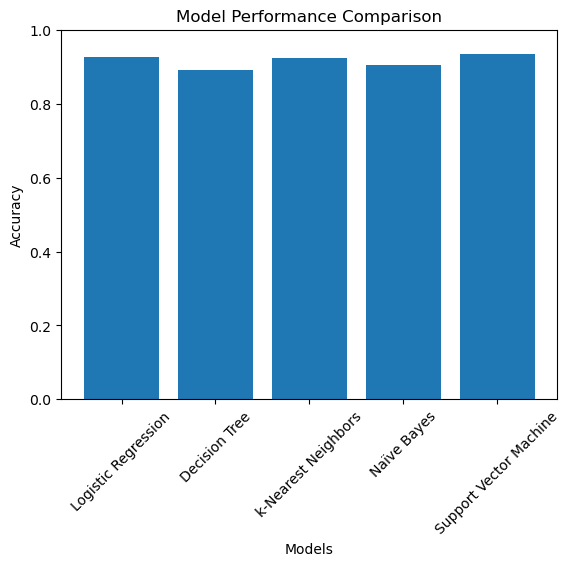

In [48]:
import matplotlib.pyplot as plt

# Create a bar chart of model accuracies
models = ['Logistic Regression', 'Decision Tree', 'k-Nearest Neighbors', 'Naïve Bayes', 'Support Vector Machine']
accuracies = [lr_accuracy, dt_accuracy, knn_accuracy, nb_accuracy, svm_accuracy]

plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1.0)
plt.show()
